# MNIST data extraction

## Python Picles

In [1]:
import gzip
import pickle
import numpy as np

In [2]:
def read_pickle_data(file_name):
    with gzip.open(file_name, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
        return data

In [3]:
data = read_pickle_data("dataset/mnist.pkl.gz")
print(type(data))

<class 'tuple'>


In [4]:
np.set_printoptions(threshold=np.inf)

def get_MNIST_data():
    train_set, valid_set, test_set = read_pickle_data("dataset/mnist.pkl.gz")
    train_x, train_y = train_set
    valid_x, valid_y = valid_set
    train_x = np.vstack((train_x, valid_x))
    train_y = np.append(train_y, valid_y)
    test_x, test_y = test_set
    return (train_x, train_y, test_x, test_y)

In [5]:
train_x, train_y, test_x, test_y = get_MNIST_data()

14
200


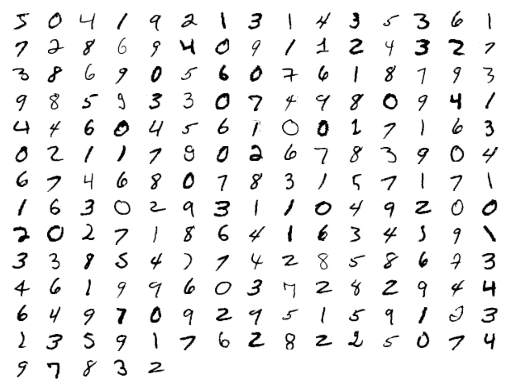

In [6]:
import matplotlib.pyplot as plt
import math

def plot_images(X):
    if X.ndim == 1:
        X = np.array([X])
    num_images = X.shape[0]
    num_rows = math.floor(math.sqrt(num_images))
    num_cols = math.ceil(num_images/num_rows)
    print(num_rows)
    print(num_images)
    for i in range(num_images):
        reshaped_image = X[i,:].reshape(28,28)
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(reshaped_image, cmap = plt.cm.Greys)
        plt.axis('off')
    plt.show()

plot_images(train_x[0:200, :])

# IDX format

All the integers in the files are stored in the MSB first (high endian) format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header.

There are 4 files:

train-images-idx3-ubyte: training set images

train-labels-idx1-ubyte: training set labels

t10k-images-idx3-ubyte:  test set images

t10k-labels-idx1-ubyte:  test set labels


The training set contains 60000 examples, and the test set 10000 examples.

The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000.

In [9]:
import kagglehub

# Download latest version
kaggle_path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", kaggle_path)

Path to dataset files: /Users/anastasiarusakova/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [10]:
def read_bin_data(file_name):
    with open(file_name, 'rb') as f:
        data = f.read()
        return data

In [11]:
print(type(train_x))
print(train_x.shape)

<class 'numpy.ndarray'>
(60000, 784)


### Читаємо файл як бінарний масив

In [12]:
bin_data = read_bin_data(f"{kaggle_path}/train-images.idx3-ubyte")

In [13]:
print(bin_data[0:200].hex())

000008030000ea600000001c0000001c0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000031212127e88af1aa6fff77f0000000000000000000000001e245e9aaafdfdfd


### Перші 4 байти - магічне число

In [14]:
magic = int.from_bytes(bin_data[:4], "big")
print(magic)

2051


In [15]:
print(bin_data[4:8].hex())
nr_of_pics = int.from_bytes(bin_data[4:8], "big")
print(nr_of_pics)

0000ea60
60000


In [16]:
nr_of_rows = int.from_bytes(bin_data[8:12], "big")
print(nr_of_rows)

28


### Функція де ми читаємо опції і повертаємо дані з картинками

In [17]:
def read_idx_data(file_name):
    with open(file_name, 'rb') as f:
        magic = int.from_bytes(f.read(4), "big")
        nr_of_pics = int.from_bytes(f.read(4), "big")
        nr_of_rows = int.from_bytes(f.read(4), "big")
        nr_of_cols = int.from_bytes(f.read(4), "big")
        print(f"{nr_of_pics}: {nr_of_rows}x{nr_of_cols}")
        data = f.read()
        return data

In [18]:
data = read_idx_data(f"{kaggle_path}/train-images.idx3-ubyte")

60000: 28x28


In [19]:
# 60000 - nr_of_pics
# 784 - 28 x 28

print(len(data)/60000)
images = np.zeros((60000, 784))
for i in range(60000):
    images[i] = np.frombuffer(data, dtype=np.uint8, count=784, offset=i * 784)
print(images[0].shape)

784.0
(784,)


14
200


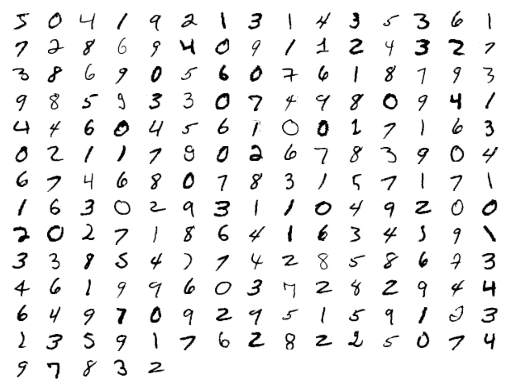

In [20]:
plot_images(images[0:200])

In [21]:
def read_idx_labels(file_name):
    with open(file_name, 'rb') as f:
        magic = int.from_bytes(f.read(4), "big")
        nr_of_labels = int.from_bytes(f.read(4), "big")
        print(f"{nr_of_labels}")
        data = f.read()
        return data

In [22]:
labels = read_idx_labels(f"{kaggle_path}/train-labels.idx1-ubyte")

60000


In [23]:
labels_array = np.zeros(60000)
labels_array = np.frombuffer(labels, dtype=np.uint8, count=60000, offset=0)

In [24]:
for i in range(10):
    print(labels_array[i])

5
0
4
1
9
2
1
3
1
4


In [25]:
pip freeze

anyio @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_a17a7759g2/croot/anyio_1706220182417/work
appnope @ file:///Users/ktietz/demo/mc3/conda-bld/appnope_1629146036738/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/croot-wbf5edig/argon2-cffi-bindings_1644845754377/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
async-lru @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_02efro5ps8/croot/async-lru_1699554529181/work
attrs @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_73lbj1xbpc/croot/attrs_1729089415510/work
Babel @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_00k1rl2pus/croot/babel_1671781944131/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4 @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_94rx5n7w